# DBF V-n Diagram

## *Joshua Glottmann*

In [1]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.3f}'.format})

arr = np.array

In [2]:
def vn(m=13, k='k', l=1):
    m *= 0.453592
    g = 9.80665
    W = m * g
    S = 60 * 12 * 0.0254 ** 2

    CLmax = 1.67
    CLmax_ = -.62 
    nmax = 2.23
    nmax_ = -1.25

    d = 1.127
    
    
    conv = 3.28084 # 1.944

    Vs = np.sqrt((2 * W) / (d * S * CLmax)) * conv
    Vs_ = np.sqrt((2 * W) / (d * S * abs(CLmax_))) * conv
    Vc = np.sqrt((2 * W) / (d * S * .804)) * conv
    Vne = 1.5 * Vc
    
    
    # 1 -> A
    n1A = np.arange(1, nmax, .001)
    V1A = Vs * np.sqrt(n1A)

    # A -> B @ nmax
    VAB = np.arange(max(V1A), Vne, .001)
    nAB = np.ones(len(VAB)) * nmax

    
    # -1 -> D
    nND = np.arange(nmax_, -1, .001)
    VND = Vs_ * np.sqrt(abs(nND))

    # D -> C @ nmax_
    VDC = np.arange(max(VND), Vne, .001)
    nDC = np.ones(len(VDC)) * nmax_


    # B -> C @ Vne
    nBC = np.arange(nmax_, nmax , .001)
    VBC = np.ones(len(nBC)) * Vne

    # 0 -> 1 @ Vs
    n10 = np.arange(0, 1, .001)
    V10 = np.ones(len(n10)) * Vs

    # 0 -> -1 @ Vs_
    n0N = np.arange(-1, 0, .001)
    V0N = np.ones(len(n0N)) * Vs_

    # Vs -> V* @ n = 0
    V00 = np.arange(Vs, Vs_, .001)
    n00 = np.zeros(len(V00))


    # 0 -> 1 (imaginary)
    nP_ = np.arange(0, nmax , .001)
    VP_ = Vs * np.sqrt(nP_)

    # 0 -> -1 (imaginary)
    nN_ = np.arange(nmax_, 0, .001)
    VN_ = Vs_ * np.sqrt(abs(nN_))


    # Vc
    nCR = np.arange(0, nmax, .001)
    VCR = np.ones(len(nCR)) * Vc

    # V*
    nCR = np.arange(0, nmax, .001)
    VAS = np.ones(len(nCR)) * max(V1A)

    
    # Horizontal Line
    if l == 1: plt.plot(np.linspace(0, Vc * 2, 100), np.zeros(100), c='k', linewidth=1, alpha=.8)

    plt.plot(V1A, n1A, c=k, label='Mission ' + str(l)) # 1 -> A
    plt.plot(VAB, nAB, c=k) # A -> B @ nmax
    plt.plot(VND, nND, c=k) # -1 -> D
    plt.plot(VDC, nDC, c=k) # D -> C @ nmax_

    plt.plot(VBC, nBC, c=k) # B -> C @ Vne
    plt.plot(V10, n10, c=k) # 0 -> 1 @ Vs 
    plt.plot(V0N, n0N, c=k) # 0 -> -1 @ Vs_
    plt.plot(V00, n00, c=k) # Vs -> V* @ n = 0

    plt.plot(VP_, nP_, c=k, linestyle='--') # 0 -> 1 (imaginary)
    plt.plot(VN_, nN_, c=k, linestyle='--') # 0 -> -1 (imaginary)

    # plt.plot(VCR, nCR, c=k, linestyle='--', linewidth=1) # Vc
    # plt.annotate('$V_C$', [Vc + 1, .15], size=12)
    plt.scatter([Vc], [0], c=k, linewidth=2)
    if l == 1: plt.scatter([-Vc], [0], c='k', linewidth=2, label='Cruise Velocity')

    # plt.plot(VAS, nCR, c=k, linestyle='--', linewidth=1) # V*
    # plt.annotate('$V^*$', [max(V1A) + 1, 0.15], size=12)

    # plt.annotate('$V_s$', [Vs + 1, 0.15], size=12) # Vs
    
    return Vc

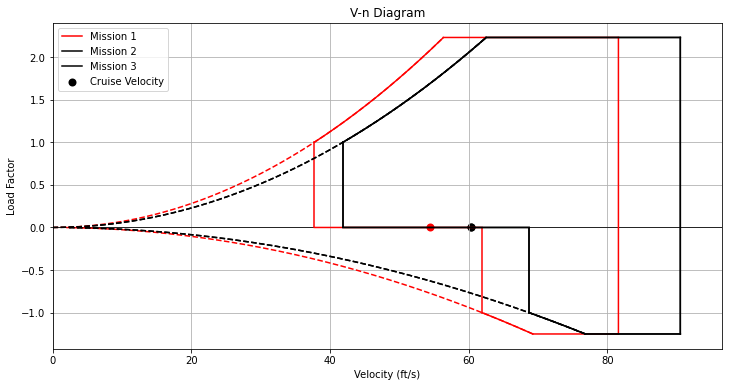

In [3]:
fig = plt.figure(figsize=(12, 6))

vn(m=13, k='r', l=1)
vn(m=16, k='k', l=2)
Vc = vn(m=16, k='k', l=3)

plt.title('V-n Diagram')
plt.xlabel('Velocity (ft/s)')
plt.ylabel('Load Factor')

plt.xlim(0, Vc * 1.6)

plt.grid();
plt.legend();
plt.savefig('V-n.png', bbox_inches='tight', dpi=300)